In [1]:
# Automatically reload custom code modules when there are changes:
%load_ext autoreload
%autoreload 2


In [2]:
# Adjust relative path so that the notebook can find the code modules:
import sys
sys.path.append('code/')


In [3]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib notebook


In [4]:
# Import code modules:
from structures import RingRoad
from animations import Animation
from learning import Game


In [5]:
# Hide warnings about safe distance violation (still in development):
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


<IPython.core.display.Javascript object>


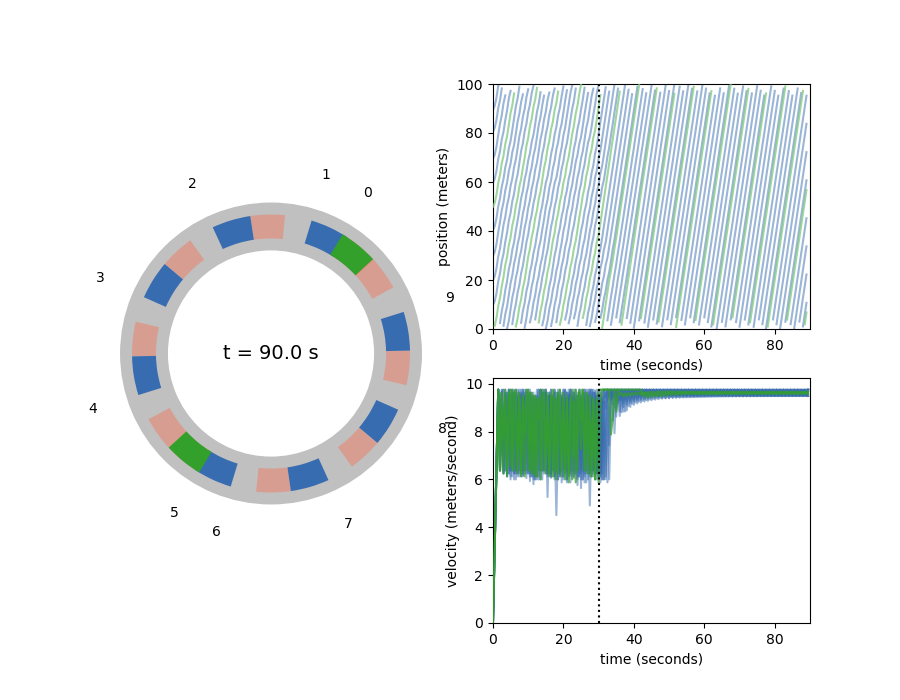

In [6]:
# Define a ring road environment:
env = RingRoad(
    num_avs = 2,
    av_even_spacing = True,
    num_vehicles = 10,  # The vechicles at index 0 is an A.V.
    ring_length = 100.0,  # The road is a cicle.
    starting_noise = 1.0,  # Uniformly add noise to starting positions.
    temporal_res = 0.5,  # Set the size of simulation steps (seconds).
    av_activate = 30,  # Set when the PID controller is activated.
    seed = 286,  # Set a random seed.
)

# Plot initial conditions:
#fig,ax = env.plot_ring(step=0, draw_cars_to_scale=True, draw_safety_buffer=True)

# Run the simulation for set number of time steps:
total_time = 90  # In seconds.
total_steps = int(np.ceil(total_time/env.dt))
env.run(steps=total_steps)

# Show step of simulation:
step = env.step
fig, axs = env.plot_dashboard(
    step=step, total_steps=total_steps,
    draw_cars_to_scale=True, draw_safety_buffer=True, label_step=True, label_cars=True,
)


<IPython.core.display.Javascript object>


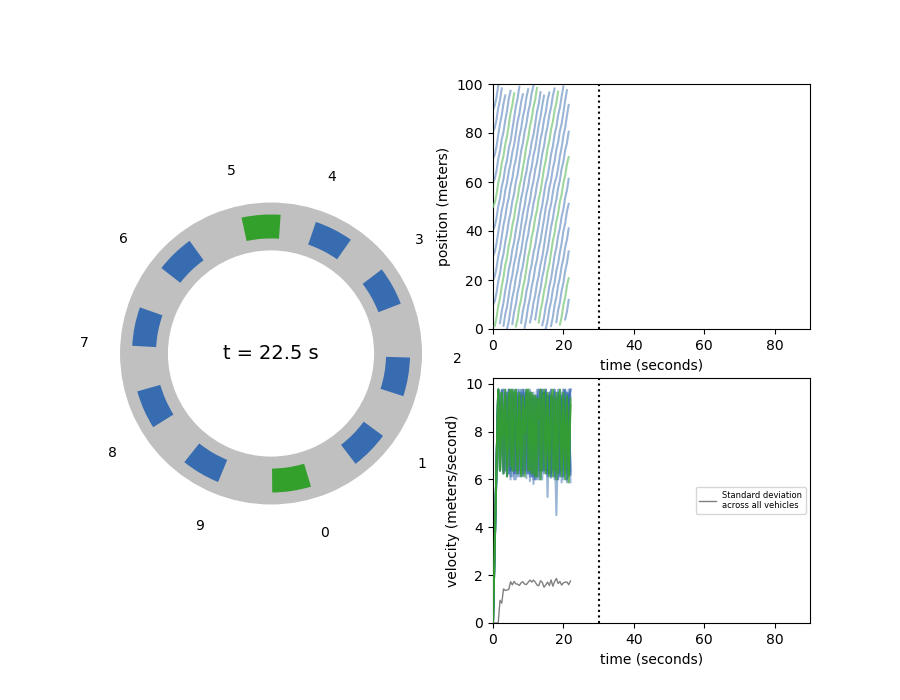

Saved : outputs/learning_goal.gif .


In [7]:
# Build animation:
anim = Animation(env, speedup=5.0, interval=5)
anim.animate_dashboard(draw_cars_to_scale=True, draw_safety_buffer=False, show_sigma=True)

# Show animation:
anim.show()

# Save animation as GIF (may take a few minutes -- pauses preview above):
# anim.save_gif(filepath="outputs/learning_goal.gif", overwrite=True)


In [8]:
# Deactivate interactive plotting mode (ends preview above):
# anim.stop()


In [9]:
road = RingRoad(
    num_avs = 3,
    av_even_spacing = True,
    av_activate = 0,
    learning_mode = True,
)

game = Game(
    road = road,
    agent_commands = [-1,0,1],
    past_steps = 3,
    max_seconds = None,
)

In [10]:
print("observation_space shape:",game.observation_space.shape)
print("action_space size:",game.action_space.n)


observation_space shape: (66,)
action_space size: 27


In [11]:
print(game.action_space())


[(-1, -1, -1), (-1, -1, 0), (-1, -1, 1), (-1, 0, -1), (-1, 0, 0), (-1, 0, 1), (-1, 1, -1), (-1, 1, 0), (-1, 1, 1), (0, -1, -1), (0, -1, 0), (0, -1, 1), (0, 0, -1), (0, 0, 0), (0, 0, 1), (0, 1, -1), (0, 1, 0), (0, 1, 1), (1, -1, -1), (1, -1, 0), (1, -1, 1), (1, 0, -1), (1, 0, 0), (1, 0, 1), (1, 1, -1), (1, 1, 0), (1, 1, 1)]


In [12]:
# Get command tuple at given index:
game.action_space.decode(action_index=3)


(-1, 0, -1)

In [13]:
# Get index of command tuple:
game.action_space.encode(agent_commands=(-1,-1,1))


2

In [14]:
display(env.get_vehicle_pos_table().tail())
display(env.get_vehicle_control_table().tail())


,vehicle_id,0,1,2,3,4,5,6,7,8,9
step,time,,,,,,,,,,
176,88.0,97.147676,1.046084,12.645282,24.120477,35.588423,47.101155,51.077310,62.546432,74.142378,85.601885
177,88.5,1.934980,5.921084,17.390829,28.995477,40.463423,51.932701,55.821221,67.421432,78.883786,90.476885
178,89.0,6.766132,10.665222,22.265829,33.741977,45.209316,56.720429,60.696221,72.163577,83.758786,95.218922
179,89.5,11.553777,15.540222,27.011615,38.616977,50.084316,61.551793,65.439673,77.038577,88.500368,0.093922
180,90.0,16.385100,20.284787,31.886615,43.363322,54.829745,66.339201,70.314673,81.780580,93.375368,4.836426


,vehicle_id,0,1,2,3,4,5,6,7,8,9
step,time,,,,,,,,,,
176,88.0,0.176145,-0.525425,4.811027,-0.513767,-0.514678,-0.174604,4.840071,-0.530398,4.957670,-0.533646
177,88.5,-0.174640,4.870005,-0.517814,4.623653,4.680343,0.173818,-0.524357,4.917272,-0.534367,4.904141
178,89.0,0.175393,-0.523445,4.798003,-0.514001,-0.516425,-0.175269,4.860097,-0.531420,4.954782,-0.531854
179,89.5,-0.174026,4.851276,-0.516855,4.625333,4.696297,0.174544,-0.526190,4.926930,-0.533673,4.887437
180,90.0,0.174709,-0.521743,4.788956,-0.514623,-0.518287,-0.175823,4.877442,-0.531990,4.948185,-0.529985
